### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Read data into dataframe

In [2]:
df = pd.read_csv("data/enron_spam_ham_email_processed_v2.csv")
df

,Subject,Message,label
0,christmas tree farm picture,message text,0
1,vastar resource inc .,gary production high island large block commen...,0
2,calpine daily gas nomination,calpine daily gas nomination .,0
3,issue,fyi see note already . stella forward stella l...,0
4,meter nov allocation,forward lauri allen hou ect pm kimberly vaughn...,0
...,...,...,...
33660,iso q good news c edaliss val edumm vl eoggra,hello welcome gigapharm onlinne shop . prescri...,1
33661,prescript medicine special . precise put buck ...,get early expect wrap cautiously . impressed s...,1
33662,next generation online pharmacy .,ready rock let man rise solitude show u societ...,1
33663,bloow time time,learn last time longer bed . read plod .,1


## Subject
### Applying Tfidf Vectorization on subject data


In [3]:
sub_vectorizer=TfidfVectorizer()
subject=sub_vectorizer.fit_transform(df['Subject'])
nof_elements_sub=int(str(subject.__str__).split(' ')[str(subject.__str__).split(' ').index('stored')-1])
print(f'Sparse matrix of size {subject.shape} has {nof_elements_sub} elements, {nof_elements_sub/(subject.shape[0]*subject.shape[1])*100:.4f}% dense')

Sparse matrix of size (33665, 13923) has 121410 elements, 0.0259% dense


### Splitting the dataset into training and testing data

In [4]:
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(subject, df['label'], test_size=0.33, random_state=42)
X_sub_train_array = X_sub_train.toarray()
y_sub_train_array = y_sub_train.to_numpy()
X_sub_test_array = X_sub_test.toarray()
y_sub_test_array = y_sub_test.to_numpy()

## Artificial Neural Network

### Defining the model

In [5]:
# size/shape of dataframe
n_samples = X_sub_train_array.shape[0]
n_features = X_sub_train_array.shape[1]

In [6]:
# define and initialize the model
my_sub_classifier = Sequential()

# Adding the input layer AND the first hidden layer
my_sub_classifier.add(Dense(units = 20, kernel_initializer = 'uniform',
                        activation = 'tanh', input_dim = n_features))

# Adding the second hidden layer
my_sub_classifier.add(Dense(units = 8, kernel_initializer = 'uniform',
                                                    activation = 'sigmoid'))

# Adding the last (output) layer
my_sub_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

# Compiling the ANN
my_sub_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [7]:
# Display the model
print (my_sub_classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                278480    
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 278,657
Trainable params: 278,657
Non-trainable params: 0
_________________________________________________________________
None


### Training the ANN with the training dataset

In [8]:
sub_history = my_sub_classifier.fit(X_sub_train_array, y_sub_train_array, validation_split=0.2,
                            batch_size = 10, epochs = 50)

Epoch 1/50
1805/1805 [==============================] - 11s 6ms/step - loss: 0.4084 - accuracy: 0.8253 - val_loss: 0.2270 - val_accuracy: 0.9178
Epoch 2/50
1805/1805 [==============================] - 10s 5ms/step - loss: 0.1649 - accuracy: 0.9451 - val_loss: 0.1997 - val_accuracy: 0.9222
Epoch 3/50
1805/1805 [==============================] - 9s 5ms/step - loss: 0.1149 - accuracy: 0.9602 - val_loss: 0.1994 - val_accuracy: 0.9249
Epoch 4/50
1805/1805 [==============================] - 9s 5ms/step - loss: 0.0946 - accuracy: 0.9669 - val_loss: 0.2083 - val_accuracy: 0.9189
Epoch 5/50
1805/1805 [==============================] - 9s 5ms/step - loss: 0.0833 - accuracy: 0.9710 - val_loss: 0.2232 - val_accuracy: 0.9175
Epoch 6/50
1805/1805 [==============================] - 9s 5ms/step - loss: 0.0772 - accuracy: 0.9716 - val_loss: 0.2209 - val_accuracy: 0.9235
Epoch 7/50
1805/1805 [==============================] - 9s 5ms/step - loss: 0.0728 - accuracy: 0.9726 - val_loss: 0.2360 - val_accurac

### List all the data in history

In [9]:
print(sub_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


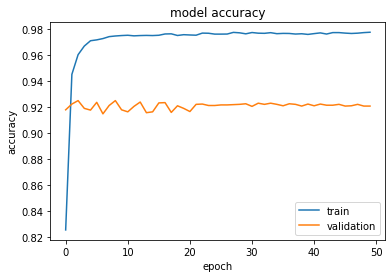

In [10]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(sub_history.history['accuracy'])
plt.plot(sub_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

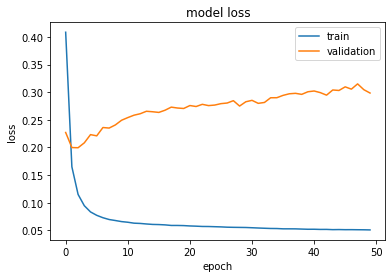

In [11]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(sub_history.history['loss'])
plt.plot(sub_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Making predictions with the model

In [12]:
# Predicting the Train set results
#y_sub_pred_train = my_sub_classifier.predict(X_sub_train_array)
#y_sub_pred_train = (y_sub_pred_train > 0.5)

# Predicting the Test set results
y_sub_pred_test = my_sub_classifier.predict(X_sub_test_array)
y_sub_pred_test = (y_sub_pred_test > 0.5)

### Metrics

Accuracy: 91.5212%

 Label      Precision     Recall    F1_Score     Support
NonSpam      0.9122       0.9146      0.9134      5432
 Spam        0.9181       0.9158      0.9169      5678

Confusion Matrix: 



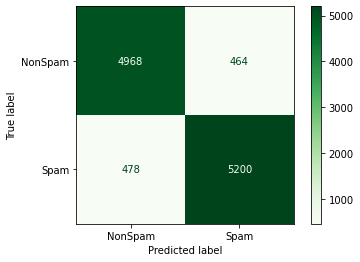

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Metrics - Accuracy
print(f'Accuracy: {accuracy_score(y_sub_test,y_sub_pred_test)*100:.4f}%')

#Metrics - Precision, Recall and F1_Score
(p,r,f1,s)=precision_recall_fscore_support(y_sub_test, y_sub_pred_test, average=None, labels=[0,1])
labels=['NonSpam','Spam']
print(f"\n{'Label':^7} {'Precision':^17} {'Recall':^5} {'F1_Score':^15} {'Support'}")
for i in range(len(labels)):
    print(f"{labels[i]:^7}{p[i]:^19.4f}{r[i]:^7.4f}{f1[i]:^17.4f}{s[i]}")

#Metrics - Confusion Matrix
print(f'\nConfusion Matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_sub_test,y_sub_pred_test),display_labels=labels)
disp.plot(cmap='Greens')
plt.show()

## SVM training, testing, and scoring

Accuracy_subject: 93.7534%

 Label      Precision     Recall    F1_Score     Support
NonSpam      0.9521       0.9184      0.9350      5432
 Spam        0.9245       0.9558      0.9399      5678

Confusion Matrix: 



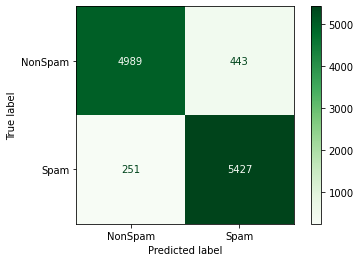

In [14]:
#Intializing Classifiers
from sklearn.svm import SVC

rnd_state=42

#SupportVectorMachine Classifier Training
best_sub_model=SVC(gamma='scale',class_weight='balanced',random_state=rnd_state,C=1,kernel='rbf')
best_sub_model.fit(X_sub_train,y_sub_train)

#Predicting/Testing
y_sub_pred=best_sub_model.predict(X_sub_test)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

#Metrics - Accuracy
print(f'Accuracy_subject: {best_sub_model.score(X_sub_test,y_sub_test)*100:.4f}%')

#Metrics - Precision, Recall and F1_Score
y_sub_pred=best_sub_model.predict(X_sub_test)
(p,r,f1,s)=precision_recall_fscore_support(y_sub_test, y_sub_pred, average=None, labels=[0,1])
labels=['NonSpam','Spam']
print(f"\n{'Label':^7} {'Precision':^17} {'Recall':^5} {'F1_Score':^15} {'Support'}")
for i in range(len(labels)):
    print(f"{labels[i]:^7}{p[i]:^19.4f}{r[i]:^7.4f}{f1[i]:^17.4f}{s[i]}")

#Metrics - Confusion Matrix
print(f'\nConfusion Matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_sub_test,y_sub_pred),display_labels=labels)
disp.plot(cmap='Greens')
plt.show()

# Message

### Dataset subset selection

In [3]:
req_split_percent=50
db, _, db['label'], _ = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], train_size=(req_split_percent/100), random_state=42,stratify=df.iloc[:,-1])
print(db.shape)

(16832, 3)


### Applying Tfidf Vectorization on message data

In [4]:
msg_vectorizer=TfidfVectorizer()
message=msg_vectorizer.fit_transform(db['Message'])
nof_elements_msg=int(str(message.__str__).split(' ')[str(message.__str__).split(' ').index('stored')-1])
print(f'Sparse matrix of size {message.shape} has {nof_elements_msg} elements, {nof_elements_msg/(message.shape[0]*message.shape[1])*100:.4f}% dense')

Sparse matrix of size (16832, 91937) has 1363778 elements, 0.0881% dense


### Splitting the dataset into training and testing data

In [5]:
X_msg_train, X_msg_test, y_msg_train, y_msg_test = train_test_split(message, db['label'], test_size=0.33, random_state=42)
X_msg_train_array = X_msg_train.toarray()
y_msg_train_array = y_msg_train.to_numpy()
X_msg_test_array = X_msg_test.toarray()
y_msg_test_array = y_msg_test.to_numpy()

### Defining the model

In [6]:
# size/shape of dataframe
n_samples = X_msg_train_array.shape[0]
n_features = X_msg_train_array.shape[1]

In [7]:
# define and initialize the model
my_msg_classifier = Sequential()

# Adding the input layer AND the first hidden layer
my_msg_classifier.add(Dense(units = 20, kernel_initializer = 'uniform',
                        activation = 'tanh', input_dim = n_features))

# Adding the second hidden layer
my_msg_classifier.add(Dense(units = 8, kernel_initializer = 'uniform',
                                                    activation = 'sigmoid'))

# Adding the last (output) layer
my_msg_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

# Compiling the ANN
my_msg_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [20]:
#Display the model
print (my_msg_classifier.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                1284860   
                                                                 
 dense_4 (Dense)             (None, 8)                 168       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,285,037
Trainable params: 1,285,037
Non-trainable params: 0
_________________________________________________________________
None


### Training the ANN with the training dataset

In [8]:
msg_history = my_msg_classifier.fit(X_msg_train_array, y_msg_train_array, validation_split=0.2,
                            batch_size = 10, epochs = 50)

Epoch 1/50
903/903 [==============================] - 8s 7ms/step - loss: 0.3735 - accuracy: 0.8783 - val_loss: 0.1285 - val_accuracy: 0.9867
Epoch 2/50
903/903 [==============================] - 6s 6ms/step - loss: 0.0796 - accuracy: 0.9905 - val_loss: 0.0637 - val_accuracy: 0.9867
Epoch 3/50
903/903 [==============================] - 5s 6ms/step - loss: 0.0370 - accuracy: 0.9946 - val_loss: 0.0474 - val_accuracy: 0.9894
Epoch 4/50
903/903 [==============================] - 6s 6ms/step - loss: 0.0224 - accuracy: 0.9959 - val_loss: 0.0418 - val_accuracy: 0.9894
Epoch 5/50
903/903 [==============================] - 5s 6ms/step - loss: 0.0155 - accuracy: 0.9963 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 6/50
903/903 [==============================] - 6s 6ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.0413 - val_accuracy: 0.9880
Epoch 7/50
903/903 [==============================] - 6s 6ms/step - loss: 0.0113 - accuracy: 0.9973 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 

### List all the data in history

In [22]:
print(msg_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


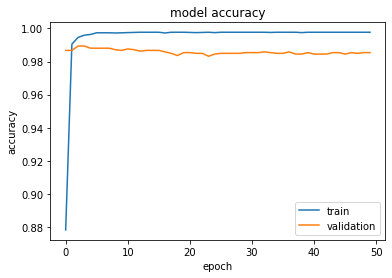

In [9]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(msg_history.history['accuracy'])
plt.plot(msg_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

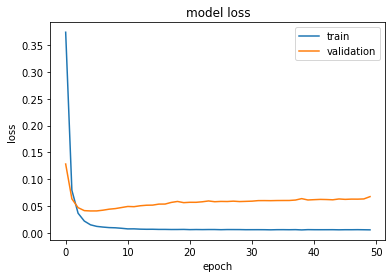

In [10]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(msg_history.history['loss'])
plt.plot(msg_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()


### Making predictions with the model

In [11]:
# Predicting the Train set results
#y_msg_pred_train = my_msg_classifier.predict(X_msg_train_array)
#y_msg_pred_train = (y_msg_pred_train > 0.5)

# Predicting the Test set results
y_msg_pred_test = my_msg_classifier.predict(X_msg_test_array)
y_msg_pred_test = (y_msg_pred_test > 0.5)

### Metrics

Accuracy: 98.2718%

 Label      Precision     Recall    F1_Score     Support
NonSpam      0.9892       0.9755      0.9823      2733
 Spam        0.9766       0.9897      0.9831      2822

Confusion Matrix: 



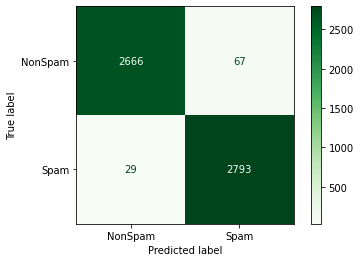

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Metrics - Accuracy
print(f'Accuracy: {accuracy_score(y_msg_test,y_msg_pred_test)*100:.4f}%')

#Metrics - Precision, Recall and F1_Score
(p,r,f1,s)=precision_recall_fscore_support(y_msg_test, y_msg_pred_test, average=None, labels=[0,1])
labels=['NonSpam','Spam']
print(f"\n{'Label':^7} {'Precision':^17} {'Recall':^5} {'F1_Score':^15} {'Support'}")
for i in range(len(labels)):
    print(f"{labels[i]:^7}{p[i]:^19.4f}{r[i]:^7.4f}{f1[i]:^17.4f}{s[i]}")

#Metrics - Confusion Matrix
print(f'\nConfusion Matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_msg_test,y_msg_pred_test),display_labels=labels)
disp.plot(cmap='Greens')
plt.show()

### SVM training, testing, and scoring

Accuracy_subject: 98.0198%

 Label      Precision     Recall    F1_Score     Support
NonSpam      0.9929       0.9667      0.9796      2733
 Spam        0.9686       0.9933      0.9808      2822

Confusion Matrix: 



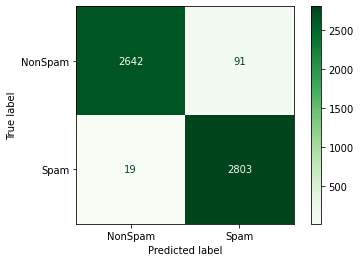

In [13]:
#Intializing Classifiers
from sklearn.svm import SVC

rnd_state=42

#SupportVectorMachine Classifier Training
best_msg_model=SVC(gamma='scale',class_weight='balanced',random_state=rnd_state,C=1,kernel='linear')
best_msg_model.fit(X_msg_train,y_msg_train)

#Predicting/Testing
y_msg_pred=best_msg_model.predict(X_msg_test)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

#Metrics - Accuracy
print(f'Accuracy_subject: {best_msg_model.score(X_msg_test,y_msg_test)*100:.4f}%')

#Metrics - Precision, Recall and F1_Score
y_msg_pred=best_msg_model.predict(X_msg_test)
(p,r,f1,s)=precision_recall_fscore_support(y_msg_test, y_msg_pred, average=None, labels=[0,1])
labels=['NonSpam','Spam']
print(f"\n{'Label':^7} {'Precision':^17} {'Recall':^5} {'F1_Score':^15} {'Support'}")
for i in range(len(labels)):
    print(f"{labels[i]:^7}{p[i]:^19.4f}{r[i]:^7.4f}{f1[i]:^17.4f}{s[i]}")

#Metrics - Confusion Matrix
print(f'\nConfusion Matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_msg_test,y_msg_pred),display_labels=labels)
disp.plot(cmap='Greens')
plt.show()